<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_2_rewrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Анализ целевой переменной Y с точки зрения статистики**

In [43]:
pip install pandas scikit-learn seaborn scipy

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [45]:
# Зазгрузка набора данных
df = pd.read_csv('/content/pokemon.csv')

In [46]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [47]:
# Выведем все колонки для удобства
for column in df.columns:
  print(f'колонка: {column}')

колонка: #
колонка: Name
колонка: Type 1
колонка: Type 2
колонка: Total
колонка: HP
колонка: Attack
колонка: Defense
колонка: Sp. Atk
колонка: Sp. Def
колонка: Speed
колонка: Generation
колонка: Legendary


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [49]:
df = df.drop('#', axis=1) # Удаляю столбец #, это индексы
df = df.drop('Name', axis=1) # Удаляю столбец Name

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


In [51]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum()) # Пропуски есть в Type 2

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [52]:
# Удаление строк с пропусками
df_copy = df.copy()
df_copy.dropna(inplace=True)
print("\nУдаление строк с пропусками")
print(df_copy.isnull().sum())


Удаление строк с пропусками
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


В своём датасете я выбрала переменную Legendary в качестве целевой. У неё как раз 2 уникальных значения (True и False, к тому же она категориальная).

In [62]:
# Преобразуем столбец Legendary в бинарную переменную (значения 0 и 1)
df['Legendary'] = df['Legendary'].astype(int)

# Generation является категорией, поэтому преобразуем в object
df['Generation'] = df['Generation'].astype(object)

In [63]:
Y = df['Legendary'] # Выбираем целевую переменную (категориальную) (выходные данные)
X = df.drop('Legendary', axis=1) # Все остальные признаки, кроме Legendary (его удаляем), для предсказания значения Y (входные данные)

In [64]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


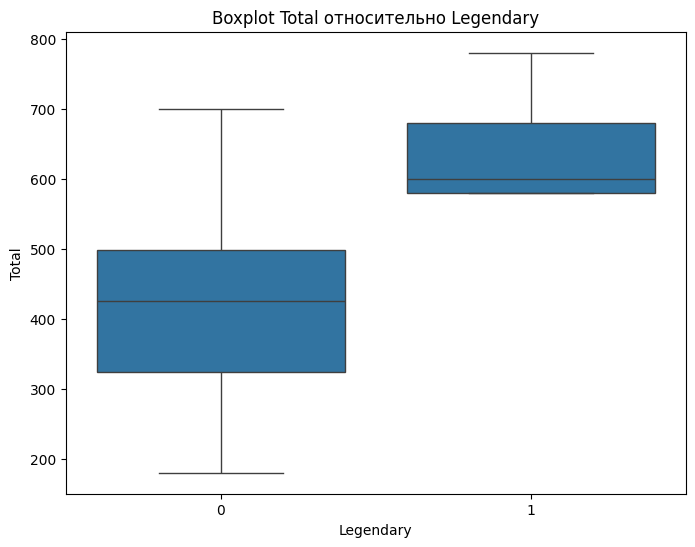

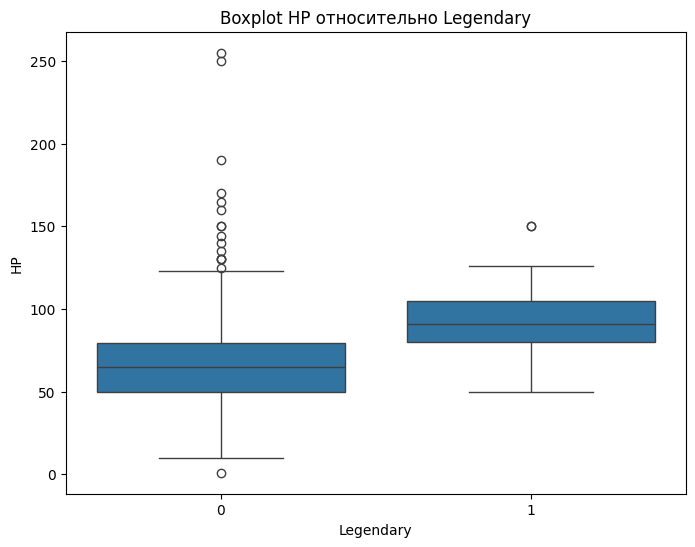

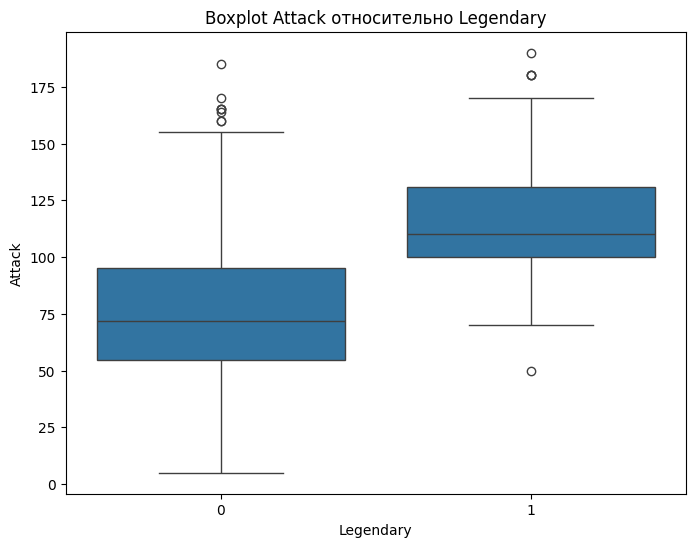

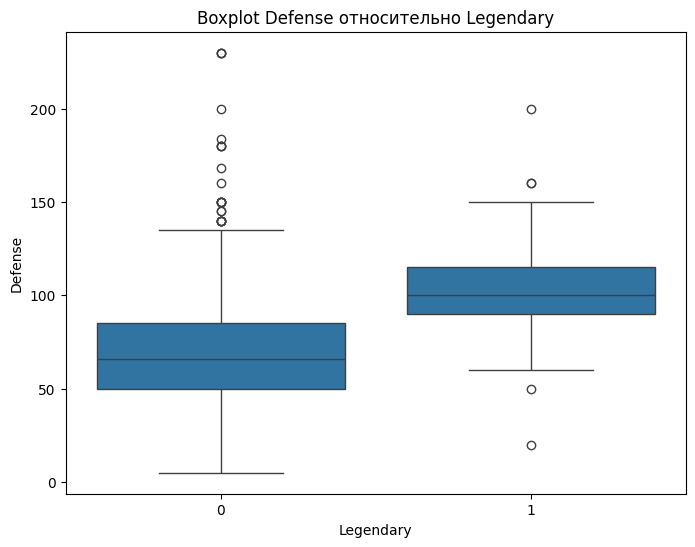

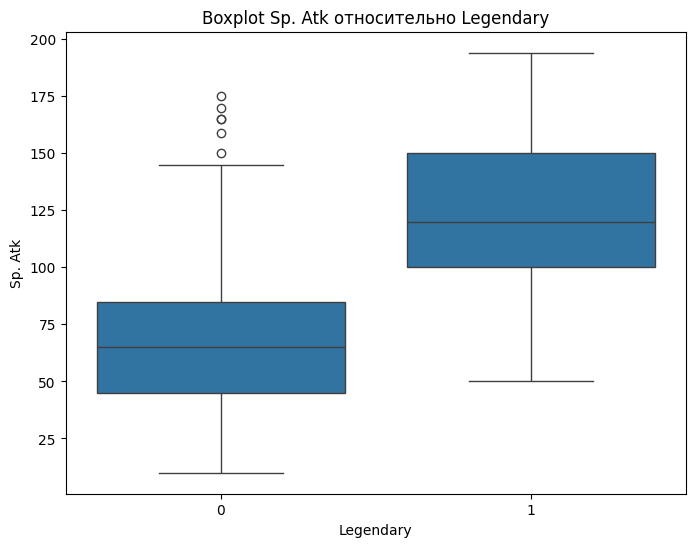

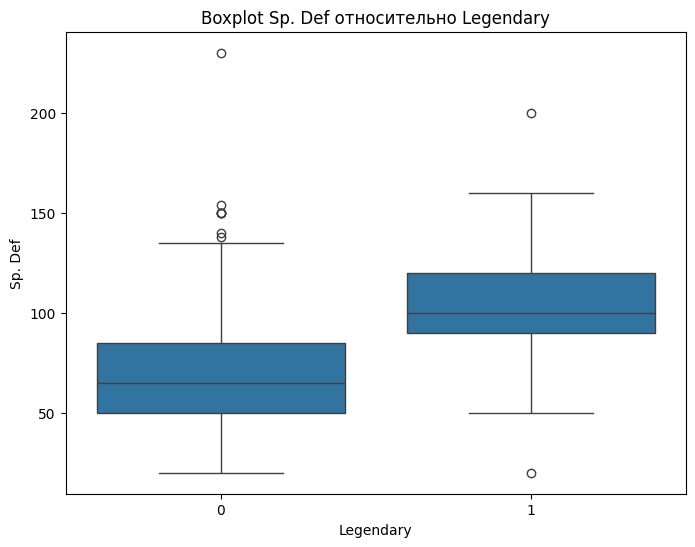

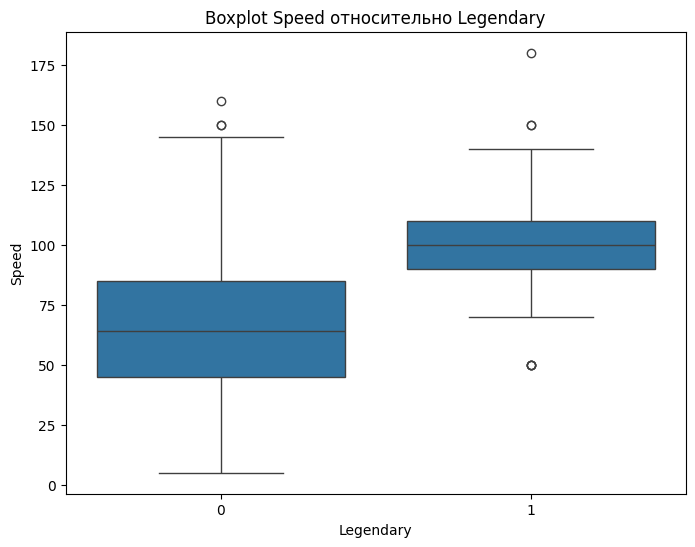

In [65]:
# Построение боксплота для каждой переменной
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sn.boxplot(x='Legendary', y=col, data=df)
  plt.title(f'Boxplot {col} относительно Legendary')
  plt.show()

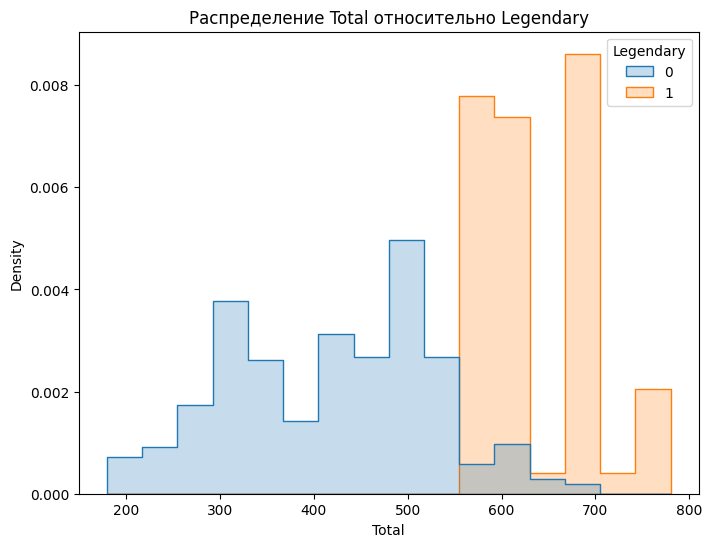

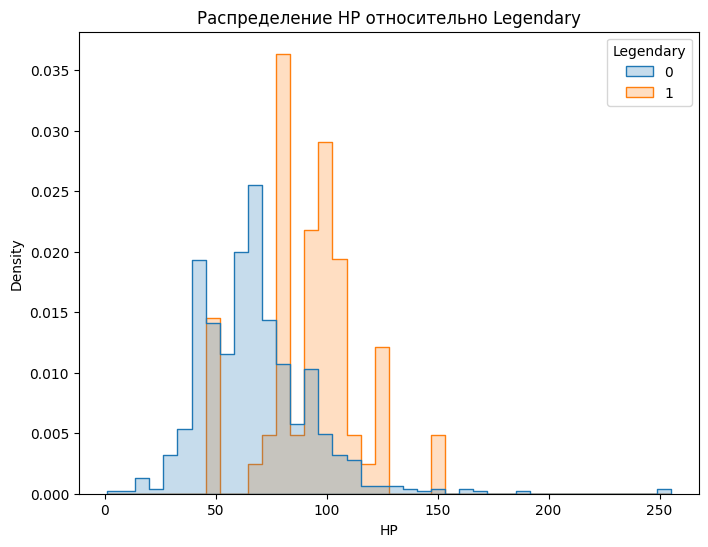

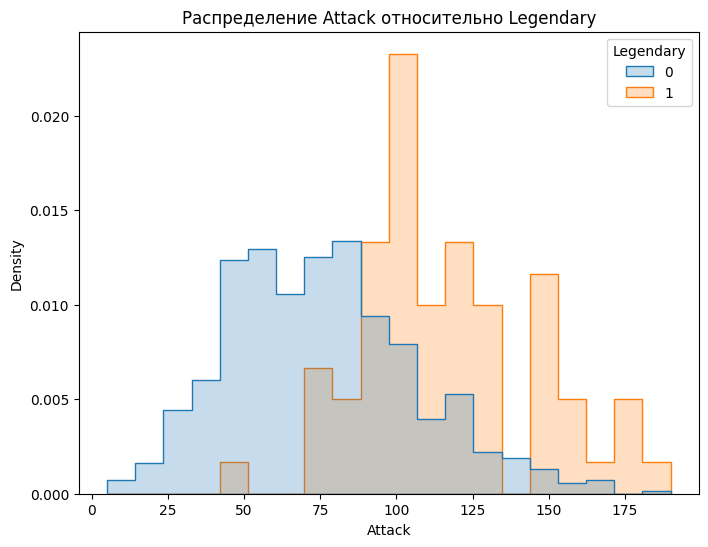

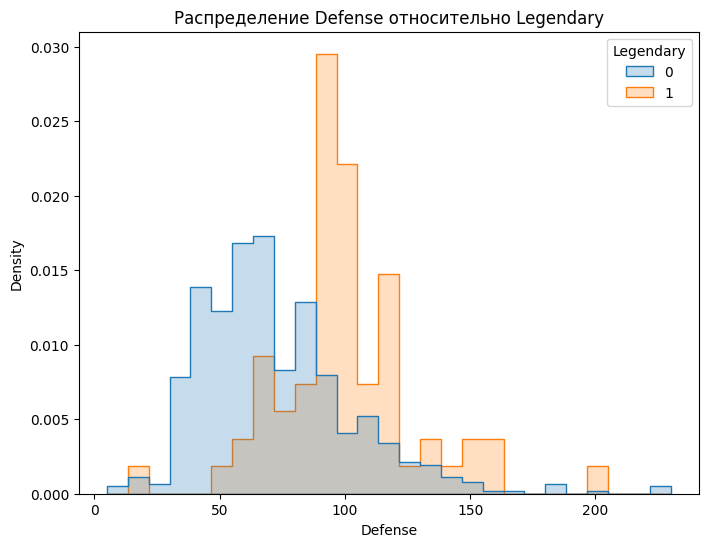

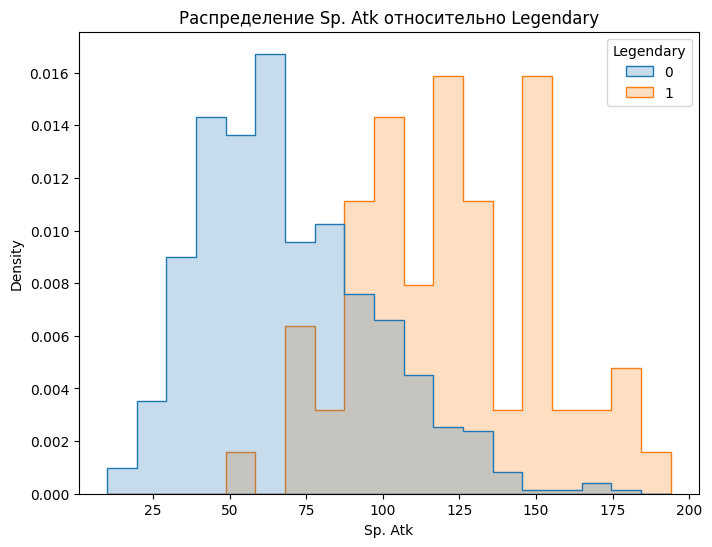

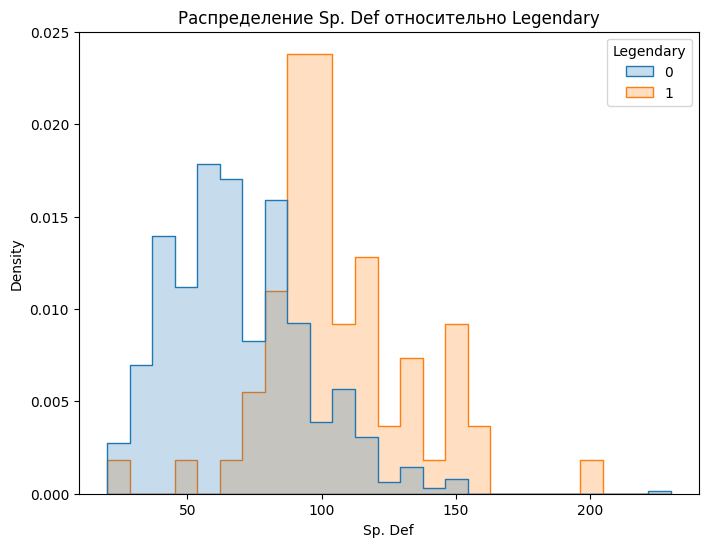

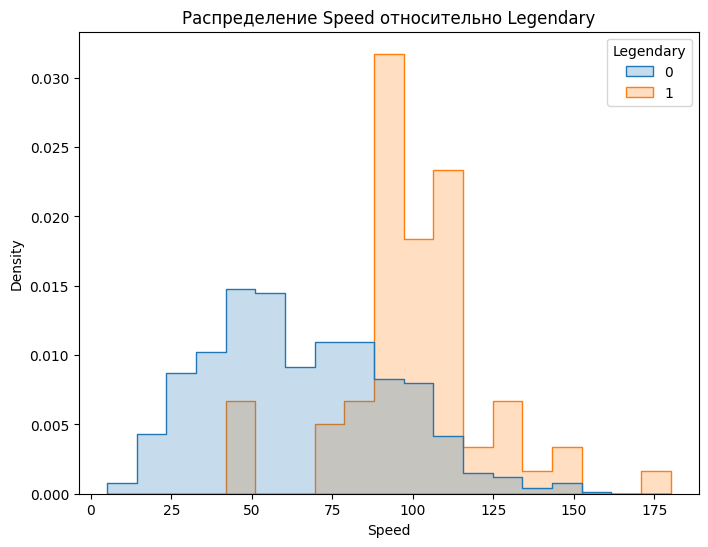

In [66]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sn.histplot(data=df, x=col, hue='Legendary', element="step", stat="density", common_norm=False)
  plt.title(f'Распределение {col} относительно Legendary')
  plt.show()

Плотность распределения суммарного количества очков (Total) у легендарных покемонов по графику гораздо больше, чем у обычных, и расположена в диапазоне от 550, поэтому с большой вероятностью покемона можно отнести к легендарному, если total попадает в этот диапазон => total является значимым признаком по отнесению покемонов к легендарным или нелегендарным.

Здоровье (HP) тоже значимый признак, потому что у легендарных покемонов наибольшая плотность распределения этого параметра где-то от 70 - 80 единиц идет, в то время как у обычных покемонов здоровье не превышает 60 - 65.
Также и с атакой (Attack) можно увидеть, что легендарные покемоны обладают большей силой (от 100 единиц наибольшая плотность), в отличие от своих обычных представителей, чья атака чаще всего варьируется от 35 до 80 примерно.
Как и предыдущие признаки, защита тоже является значимым фактором по градации покемонов: у легендарных особей от 85 единиц примерно уже наибольшая плотность распределения идет, в то время как у обычных ее среднее значение находится в районе 40 - 75.

И особая защита (Sp. Def), и скорость (Speed) у легендарных покемонов обладают наибольшими значениями показателей. Но я также заметила, что особая атака (Sp. Atk), в отличие от всех остальных признаков, совсем буквально на чуть-чуть встречается чаще у обычных представителей, чем у легендарных, но сильно я бы не принимала во внимание это наблюдение в градации покемонов, потому что разница в отношении них будет практически незначительной.

В итоге я могу сделать вывод, что по Sp. Atk точно не получится судить, куда какой покемон относится, потому что плотность распределения одинаковая практически у обеих градаций. А вот все остальные признаки являются явными показателями в отнесении покемонов к легендарным представителям или обычным.

In [68]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('Legendary')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('Legendary')[df.select_dtypes(include=['object']).columns].describe()

In [69]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
  print(f"Описательная статистика для {col}:\n")
  print(df.groupby('Legendary')[col].describe())
  print("\n" + "="*50 + "\n")

Описательная статистика для Total:

           count        mean         std    min    25%    50%    75%    max
Legendary                                                                  
0          735.0  417.213605  106.760417  180.0  324.0  425.0  498.0  700.0
1           65.0  637.384615   60.937389  580.0  580.0  600.0  680.0  780.0


Описательная статистика для HP:

           count       mean        std   min   25%   50%    75%    max
Legendary                                                             
0          735.0  67.182313  24.808849   1.0  50.0  65.0   79.5  255.0
1           65.0  92.738462  21.722164  50.0  80.0  91.0  105.0  150.0


Описательная статистика для Attack:

           count        mean        std   min    25%    50%    75%    max
Legendary                                                                
0          735.0   75.669388  30.490153   5.0   54.5   72.0   95.0  185.0
1           65.0  116.676923  30.348037  50.0  100.0  110.0  131.0  190.0


Опис

In [70]:
print("\nКатегориальные переменные:")
desc_stats_categorical
# freq - частота (или количество) наиболее частого значения, указанного в top


Категориальные переменные:


Type 1                      Type 2                     Generation  \
           count unique      top freq  count unique     top freq      count   
Legendary                                                                     
0            735     18    Water  108    374     18  Flying   84        735   
1             65     15  Psychic   14     40     13  Flying   13         65   

                           
          unique top freq  
Legendary                  
0              6   1  160  
1              6   3   18

**Total:**

У обычных покемонов среднее значение меньше (417), в отличие от легендарных (637). Также и min, и max значения соответственно у обычных меньше, чем у легендарных, что говорит о том, что легендарные покемоны обладают наибольшей суммой очков.
Стандартное отклонение у легендарных покемонов меньше, чем у обычных => разброс значений соответственно у них меньше.

**HP:**

У обычных особей среднее значение этого показателя = 67, что гораздо меньше, чем у легендарных (93). С min и max значениями соответственно такая же ситуация: обычные покемоны менее живучие.
Со стандартным отклонением ситуация чуть получше, чем у Total, и не превышает 25 единиц, но все равно разброс у обычных покемонов относительно легендарных немного больше

**Attack, Defense, Sp. Atk, Sp. Def:**

Как и у прошлых показателей, у легендарных покемонов эти признаки обладают как большими значениями в принципе, так и большими min и max показателями соответственно.
Что касается стандартного отклонения, так по атаке у обоих градаций покемонов оно практически одинаковое, а также особая атака и защита по разбросу у легендарных покемонов чуть больше будет.

**Speed:**

Естественно и здесь значение этого показателя у легендарных гораздо превышает, чем у обычных (100 против 65). Также и по min и max параметрам видно разницу в скорости представителей разных градаций покемонов.
Разброс по скорости у легендарных сильно меньше, чем у обычных, что говорит о том, что скорость большинства легендарных покемонов приближена к ее среднему значению (100).

**Type 1, Type 2, Generation:**

Обычные покемоны чаще всего по 1 типу являются водными представителями (их 108 штук из 735), а легендарные - психические (14 особей из 65).

*P. s. видимо, любят нервишки потрепать XD*

Что касается второго типа, так обе градации наиболее привержены к летающему виду (84 и 13 штук покемонов соответственно).

Насчет поколений: и те, и другие обладают всеми 6 поколениями, но у обычных чаще всего только 1 поколение присутствует (из 735 их 160), а у легендарных - 3 (из 65 их 18).

В итоге все сводится к тому, что обычные покемоны обладают гораздо меньшими значениями числовых признаков => преимущество обеспечено легендарным представителям.

# **II. Расчет теста Пирсона**

In [72]:
# Расчет коэффициента корреляции Пирсона для каждого признака
df[df.select_dtypes(include=[np.number]).columns].corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


**1) Total и Attack или Sp. Atk (0,736 или 0,747):**

Довольная высокая положительная корреляция => чем выше показатели атаки, тем больше суммарное количество очков. Чтобы избежать мультиколлинеарности, можно исключить Sp. Atk либо Sp. Def, потому что они частично отражены в Total (сумма всех числовых параметров).

С остальными признаками умеренная положительная корреляция, что также показывает пропорциональное увеличение одного параметра относительно другого.

**2) HP и Speed (0,176):**

Очень низкая положительная корреляция => оба этих признака очень слабо друг на друга влияют и практически не зависят между собой.

Похожая ситуация наблюдается и между HP и Defense (0,240) или HP и Legendary (0,274): довольно низкая положительная корреляция, что говорит о минимальной зависимости этих параметров.

**3) Attack и Sp. Def (0.264):**

Низкая положительная корреляция => атака очень слабо зависит от специальной защиты.

С остальными показателями корреляция также положительна, но более умеренна (с Total самая высокая, как было сказано выше) => пропорциональное повышение одних параметров относительно повышения других.

**4) Defense и Speed (0.015):**

Практически нулевая корреляция (самая слабая положительная среди всех) = > увеличение защиты практически никак не повлияет на увеличение скорости (и наоборот).

С остальными параметрами наблюдается умеренно-слабая положительная корреляция. И только с Total она более значительная (0,613), что говорит о влиянии этих признаков друг на друга (чем больше защита, тем больше общих очков и наоборот).

**5) Sp. Atk и Total (0.747):**

Сильная положительная корреляция между этими двумя параметрами => чем больше суммарных очков, тем больше из них может быть выделено под специальную атаку (и наоборот). Чтобы избежать мультиколлинеарности, можно исключить Sp. Atk либо Sp. Def, потому что они частично отражены в Total (сумма всех числовых параметров).

С остальными признаками корреляция более умеренно-слабая, но также положительная.

**6) Sp. Def и Total (0.718):**

Также как и со спец. атакой здесь наблюдается сильная положительная корреляция относительно общего количества очков => чем их больше, тем больше из них может быть распределено под специальную защиту. Чтобы избежать мультиколлинеарности, можно исключить Sp. Atk либо Sp. Def, потому что они частично отражены в Total (сумма всех числовых параметров).

**7) Speed и Total (0.576):**

Присутствует умеренная положительная корреляция, в отличие от остальных признаков, которые гораздо слабее влияют на скорость (особенно HP и Defense, которые уже были рассмотрены выше).

**8) Legendary и Total (0.502):**

Есть умеренная положительная корреляция, что говорит о том, что покемоны, обладающие большим количеством очков, могут быть легендарными. Но также они могут быть и обычными, потому что эта корреляция составляет где-то 50% от значения градации покемона.

Со всеми остальными признаками зависимость более слабая, но тоже положительная.

# **III. Немного машинного обучения**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [74]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки: ", categorical_features)

Категориальные признаки:  ['Type 1', 'Type 2', 'Generation']


In [75]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [76]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,700,50,160,110,160,110,110,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,600,80,110,60,150,130,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,680,80,160,60,170,130,80,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [77]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки: ", numeric_features)

Числовые признаки:  ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


In [78]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [79]:
X_processed

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [80]:
# Функция для обучения и оценки модели
def train_and_evaluate(X, Y):
  # Разделение данных на обучающую и тестовую выборки
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

  # Инициализация модели
  model = LogisticRegression(max_iter=1000)

  # Обучение модели
  model.fit(X_train, Y_train)

  # Предсказания на обучающейся выборке
  Y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(Y_train, Y_train_pred)

  # Предсказание на тестовой выборке
  Y_test_pred = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test, Y_test_pred)

  # Вывод результатов
  print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
  print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

  # Классификационный отчет
  print("\nКлассификационный отчет на тестовой выборке:")
  print(classification_report(Y_test, Y_test_pred))

  return model

In [81]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9578
Точность на тестовой выборке: 0.9062

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.33      0.15      0.21        13

    accuracy                           0.91       160
   macro avg       0.63      0.56      0.58       160
weighted avg       0.88      0.91      0.89       160



In [82]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

            Feature  Coefficient
0             Total     3.547706
4           Sp. Atk     2.457829
5           Sp. Def     2.301809
6             Speed     1.953158
1                HP     1.408349
2            Attack     1.334086
20   Type 1_Psychic     1.282587
3           Defense     1.030856
33    Type 2_Ground    -1.009383
13    Type 1_Flying     0.932324
43     Generation_4     0.810722
32     Type 2_Grass    -0.633770
44     Generation_5     0.619466
18    Type 1_Normal    -0.608781
8     Type 1_Dragon     0.575960
42     Generation_3     0.544051
11  Type 1_Fighting    -0.542652
24      Type 2_Dark    -0.507514
36    Type 2_Poison    -0.497349
40     Type 2_Water     0.475992
16    Type 1_Ground     0.444361
29      Type 2_Fire     0.443508
23     Type 1_Water    -0.425424
41     Generation_2     0.419979
10     Type 1_Fairy    -0.415150
45     Generation_6     0.355060
37   Type 2_Psychic     0.332732
19    Type 1_Poison    -0.321586
38      Type 2_Rock    -0.281410
27     Typ

# **IV. Построение модели логистической регрессии для предсказания легендарности покемона**

In [83]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9100
Отклонение точности: 0.0215


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

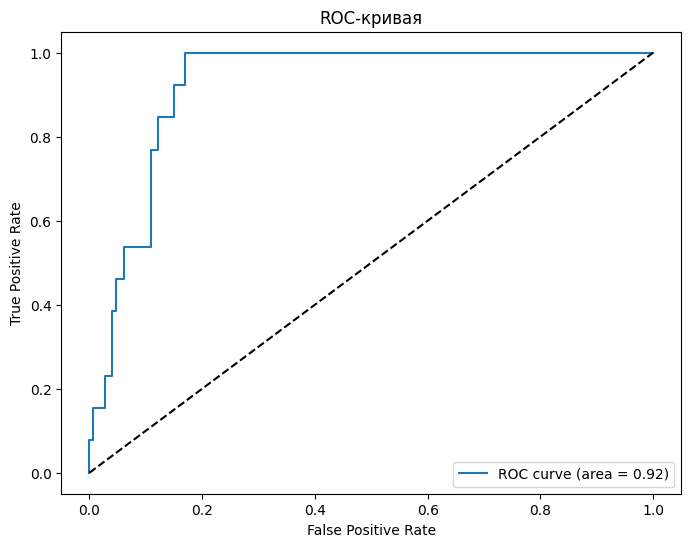

In [85]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()